<a href="https://colab.research.google.com/github/sivasankarkokkera/SPIC4-CORE-PROJECT/blob/main/Credit_Card_Fraud_Detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES:**

In [ ]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  from pylab import rcParams
  import warnings
  warnings.filterwarnings('ignore')

**READING DATASET :**

In [ ]:
data=pd.read_csv('creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**NULL VALUES:**

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

**Thus there are no null values in the dataset.**

**INFORMATION**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

**DESCRIPTIVE STATISTICS**

In [ ]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,11959.0,8009.996822,6204.332248,0.000000,2542.000000,6662.000000,12382.000000,20642.000000
V1,11959.0,-0.216230,1.583914,-27.670569,-0.978944,-0.340742,1.161273,1.960497
V2,11959.0,0.277097,1.308884,-34.607649,-0.261503,0.256346,0.883626,9.092123
V3,11959.0,0.889505,1.331824,-22.804686,0.417186,0.951223,1.613678,4.101716
V4,11959.0,0.282606,1.478162,-4.657545,-0.622456,0.213029,1.159141,11.927512


In [ ]:
data.shape

(11959, 31)

**Thus there are 284807 rows and 31 columns.**

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**FRAUD CASES AND GENUINE CASES**

In [ ]:
fraud_cases=len(data[data['Class']==1])

In [ ]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 52


In [ ]:
non_fraud_cases=len(data[data['Class']==0])

In [ ]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 11906


In [ ]:
fraud=data[data['Class']==1]

In [ ]:
genuine=data[data['Class']==0]

In [ ]:
fraud.Amount.describe()

count      52.000000
mean       97.724808
std       321.188775
min         0.000000
25%         1.000000
50%         1.000000
75%         1.772500
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
genuine.Amount.describe()

count    11906.000000
mean        62.198127
std        177.379105
min          0.000000
25%          5.292500
50%         15.950000
75%         50.000000
max       7712.430000
Name: Amount, dtype: float64

**EDA**

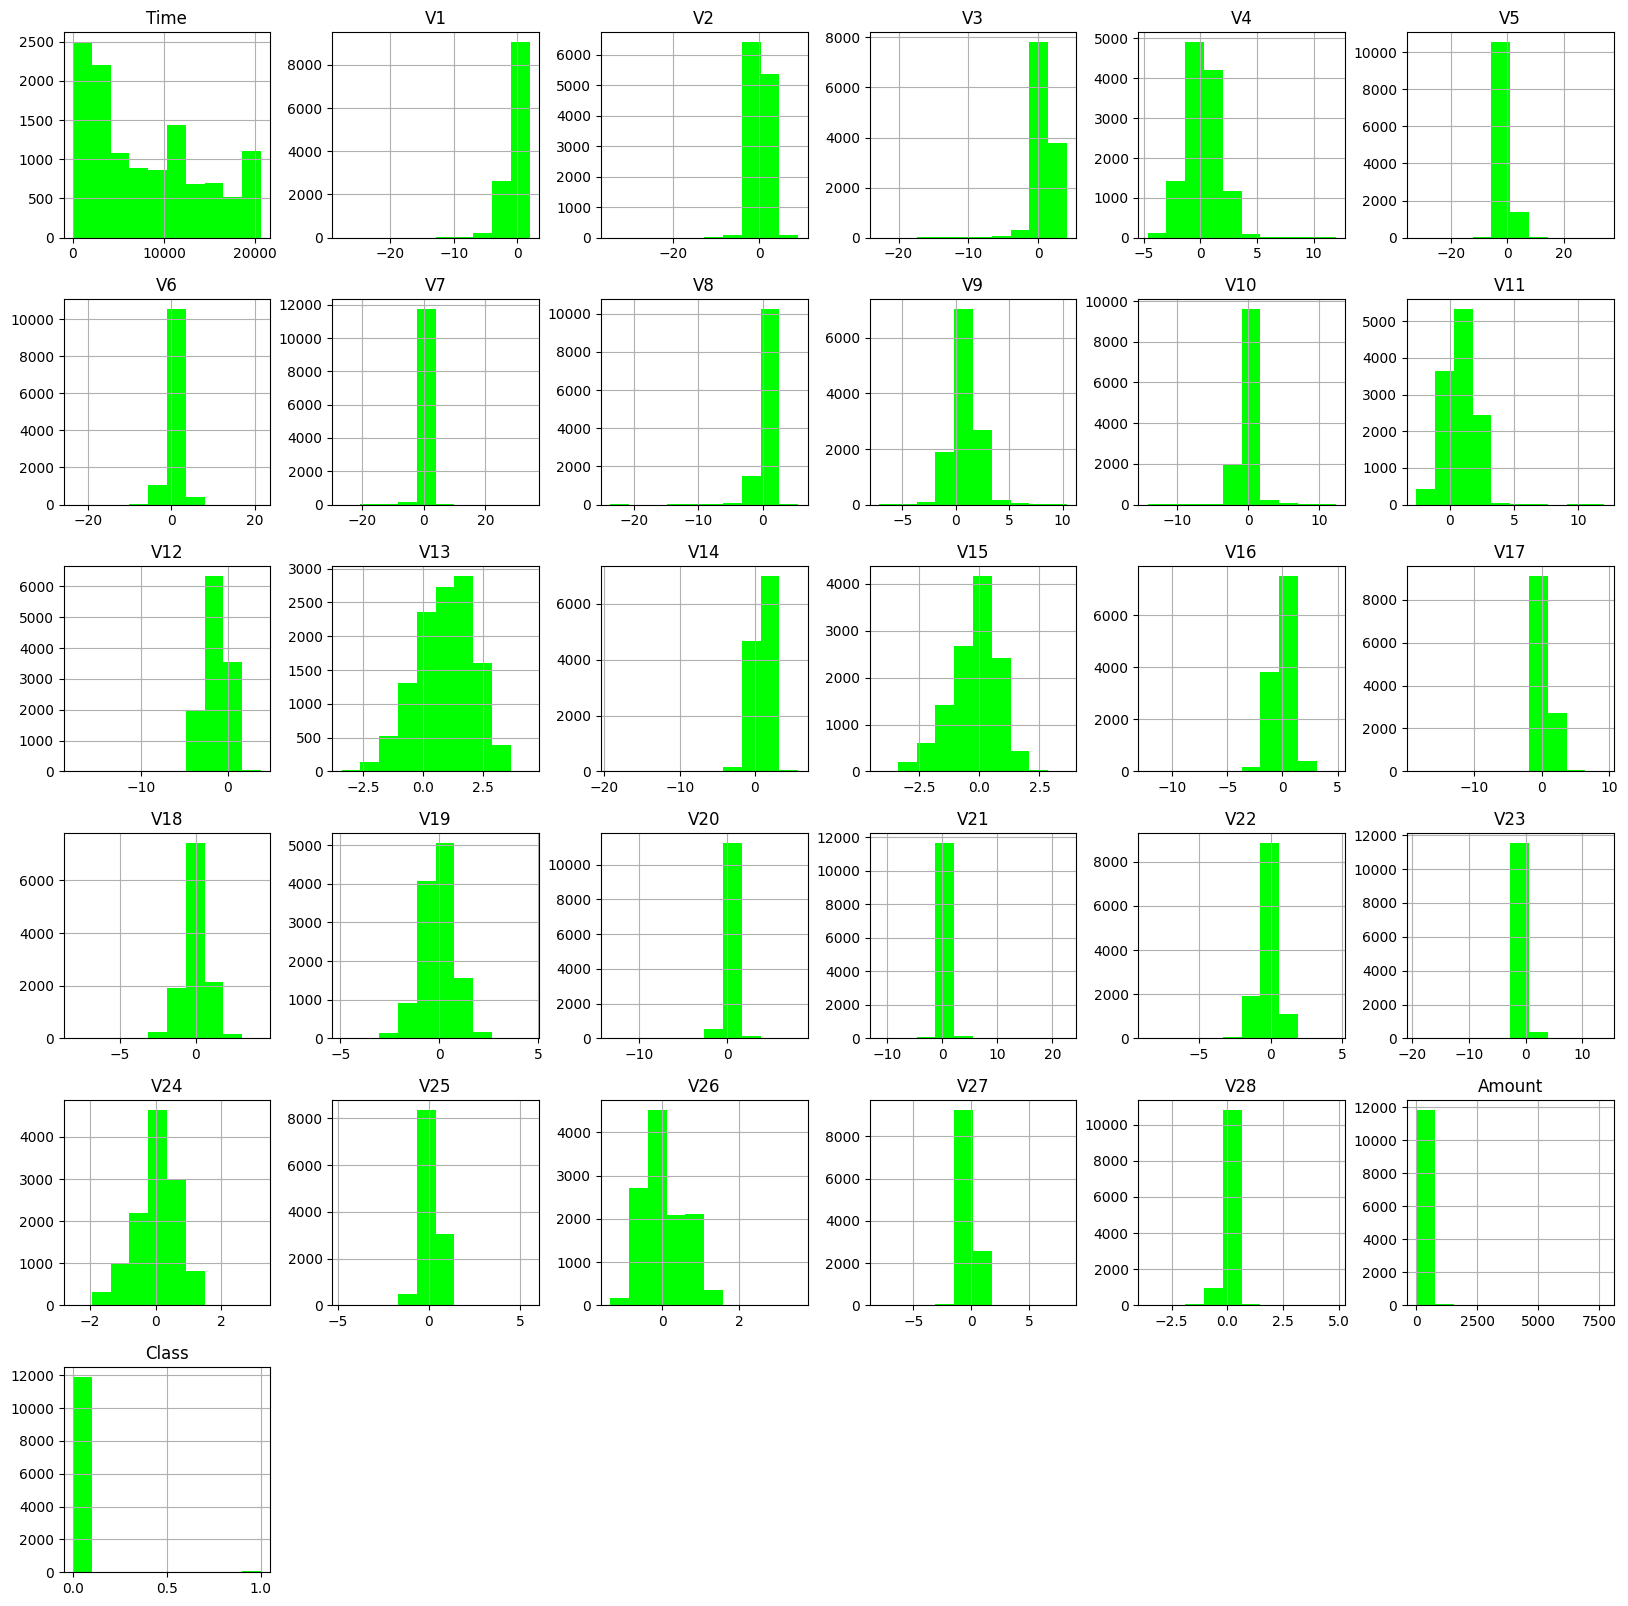

In [ ]:
data.hist(figsize=(20,20),color='lime')
plt.show()

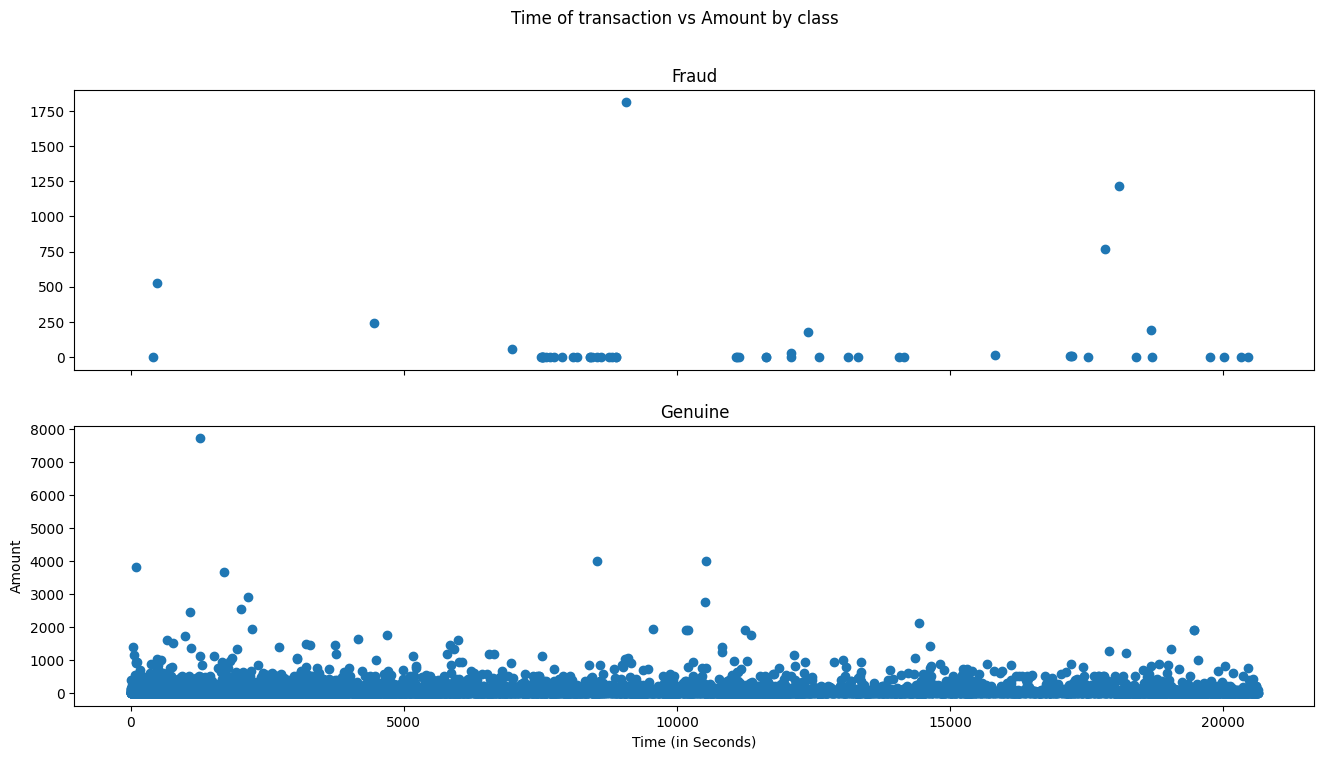

In [ ]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


**CORRELATION**

<Axes: >

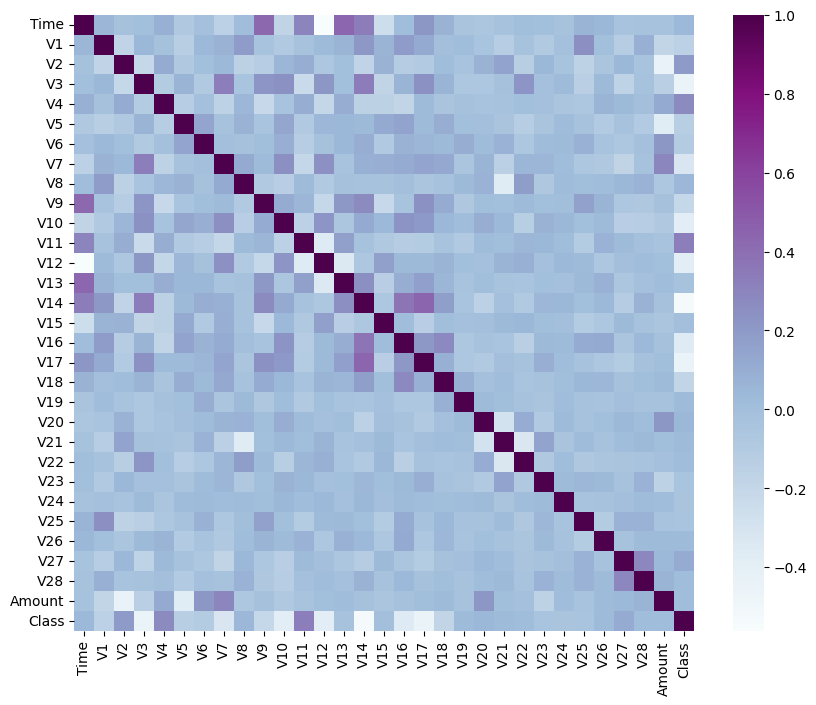

In [ ]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

**Let us build our models:**

In [ ]:
from sklearn.model_selection import train_test_split

**Model 1:**

In [ ]:
X=data.drop(['Class'],axis=1)

In [ ]:
y=data['Class']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
# Remove rows with NaN values
X_train = X_train.dropna()
y_train = y_train[X_train.index]


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)


In [ ]:
model = rfc.fit(X_train_imputed, y_train)


In [ ]:
prediction=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,prediction)

0.9994425863991081

**Model 2:**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X1=data.drop(['Class'],axis=1)

In [ ]:
y1=data['Class']

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)

In [ ]:
lr=LogisticRegression()

In [ ]:
X1_train = X1_train.dropna()
y1_train = y1_train[X1_train.index]


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X1_train_imputed = imputer.fit_transform(X1_train)


In [ ]:
model2 = lr.fit(X1_train_imputed, y1_train)


In [ ]:
prediction2=model2.predict(X1_test)

In [ ]:
import pandas as pd

# Check for NaN values
nan_columns = X1_test.columns[X1_test.isna().any()].tolist()

# Handle NaN values (e.g., by imputation or removal)
X1_test = X1_test.dropna()  # Drop rows with NaN values


In [ ]:
from sklearn.impute import SimpleImputer

# Example: Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X1_test = pd.DataFrame(imputer.fit_transform(X1_test), columns=X1_test.columns)


In [ ]:
# Check and handle NaN values in the training data (X1_train)


In [ ]:
# Example: If using Logistic Regression
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X1_train, y_train)


LogisticRegression()

In [ ]:
accuracy_score(y1_test,prediction2)

0.9983277591973244

In [ ]:
prediction2 = model2.predict(X1_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y1_test, prediction2)
print("Accuracy:", accuracy)


Accuracy: 0.9983277591973244


In [ ]:
print("y1_test shape:", y1_test.shape)
print("prediction2 shape:", prediction2.shape)


y1_test shape: (3588,)
prediction2 shape: (3588,)


In [ ]:
# Example: Trim the last row from y1_test if needed
y1_test = y1_test[:-1]


In [ ]:
prediction2 = model2.predict(X1_test)


In [ ]:
# Remove rows with NaN values
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Similarly, remove NaN values from the test set
X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Similarly, impute missing values in the test set
X_test_imputed = imputer.transform(X_test)


In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_imputed, y_train)
y_pred_rfc = rfc.predict(X_test_imputed)

# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_imputed, y_train)
y_pred_nb = nb.predict(X_test_imputed)


In [ ]:
# Continue from the previous code...

# Calculate accuracy for Random Forest Classifier
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Accuracy:", accuracy_rfc)

# Calculate accuracy for Naive Bayes Classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)


Random Forest Accuracy: 0.9994425863991081
Naive Bayes Accuracy: 0.9866220735785953


In [ ]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_imputed, y_train)
y_pred_nb = nb.predict(X_test_imputed)


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Random Forest Classifier
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Accuracy:", accuracy_rfc)

# Calculate accuracy for Naive Bayes Classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)


Random Forest Accuracy: 0.9994425863991081
Naive Bayes Accuracy: 0.9866220735785953


In [ ]:
# Remove rows with NaN values
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Similarly, remove NaN values from the test set
X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Similarly, impute missing values in the test set
X_test_imputed = imputer.transform(X_test)


In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_imputed, y_train)
y_pred_rfc = rfc.predict(X_test_imputed)

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_imputed, y_train)
y_pred_lr = lr.predict(X_test_imputed)

# Calculate accuracy for Random Forest Classifier
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Accuracy:", accuracy_rfc)

# Calculate accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Random Forest Accuracy: 0.9994425863991081
Logistic Regression Accuracy: 0.9983277591973244


In [ ]:
# Remove rows with NaN values
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Similarly, remove NaN values from the test set
X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Similarly, impute missing values in the test set
X_test_imputed = imputer.transform(X_test)


In [ ]:
from sklearn.svm import SVC


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_imputed, y_train)
y_pred_rfc = rfc.predict(X_test_imputed)

# Support Vector Machine (SVM)
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train_imputed, y_train)
y_pred_svm = svm.predict(X_test_imputed)

# Calculate accuracy for Random Forest Classifier
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Accuracy:", accuracy_rfc)

# Calculate accuracy for Support Vector Machine
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)


Random Forest Accuracy: 0.9994425863991081
Support Vector Machine Accuracy: 0.9955406911928651


In [ ]:
# Remove rows with NaN values
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Similarly, remove NaN values from the test set
X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer with a strategy (mean, median, etc.)
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Similarly, impute missing values in the test set
X_test_imputed = imputer.transform(X_test)


In [ ]:
from sklearn.svm import SVC


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_imputed, y_train)
y_pred_rfc = rfc.predict(X_test_imputed)

# Support Vector Machine (SVM)
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train_imputed, y_train)
y_pred_svm = svm.predict(X_test_imputed)

# Calculate accuracy for Random Forest Classifier
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Accuracy:", accuracy_rfc)

# Calculate accuracy for Support Vector Machine
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)


Random Forest Accuracy: 0.9994425863991081
Support Vector Machine Accuracy: 0.9955406911928651
